Using Delphes file: /home/sgoswami/mg5-tutorial/madgraph_tutorial/MG5_aMC_v3_6_3/Delphes/delphes.root
Jet pT: mean = 337.43 GeV, std = 272.60 GeV
MET   : mean = 108.74 GeV, std = 84.12 GeV


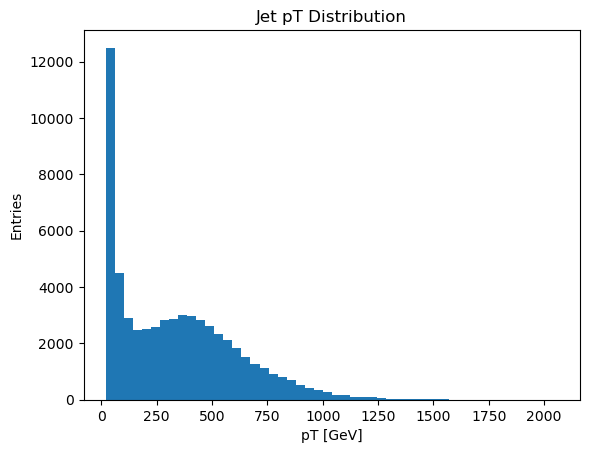

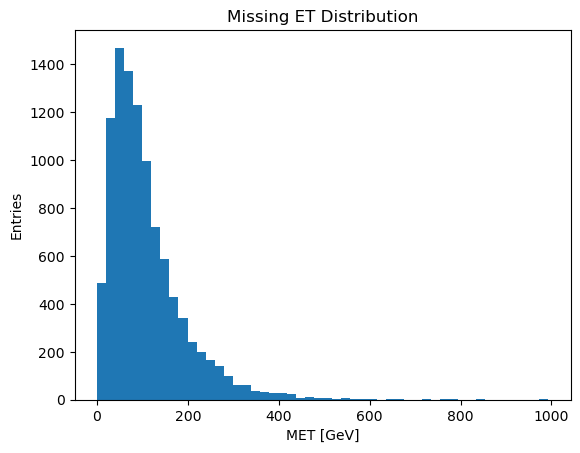

In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

# 1. Locate delphes.root automatically
delphes_file = None
for root, dirs, files in os.walk(os.getcwd()):
    if 'delphes.root' in files:
        delphes_file = os.path.join(root, 'delphes.root')
        break

if delphes_file is None:
    raise FileNotFoundError("delphes.root not found in current directory tree.")
print(f"Using Delphes file: {delphes_file}")

# 2. Open ROOT file and extract JET and MET branches
with uproot.open(delphes_file) as f:
    tree = f['Delphes']
    jet_pt = tree['Jet.PT'].array(library="np")
    met_pt = tree['MissingET.MET'].array(library="np")

# 3. Flatten arrays and compute basic statistics
jet_pt_flat = np.concatenate(jet_pt)
met_pt_flat = np.concatenate(met_pt)

print(f"Jet pT: mean = {np.mean(jet_pt_flat):.2f} GeV, std = {np.std(jet_pt_flat):.2f} GeV")
print(f"MET   : mean = {np.mean(met_pt_flat):.2f} GeV, std = {np.std(met_pt_flat):.2f} GeV")

# 4. Plot distributions
plt.figure()
plt.hist(jet_pt_flat, bins=50)
plt.title("Jet pT Distribution")
plt.xlabel("pT [GeV]")
plt.ylabel("Entries")
plt.show()

plt.figure()
plt.hist(met_pt_flat, bins=50)
plt.title("Missing ET Distribution")
plt.xlabel("MET [GeV]")
plt.ylabel("Entries")
plt.show()

Using: /home/sgoswami/mg5-tutorial/madgraph_tutorial/MG5_aMC_v3_6_3/Delphes/delphes.root
Found 40529 entries for PDGID = ±51


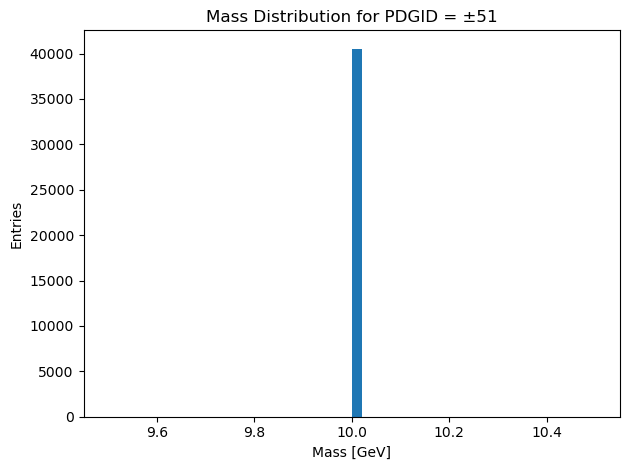

In [2]:
import os
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# 1. Locate delphes.root
delphes_file = None
for root, dirs, files in os.walk(os.getcwd()):
    if "delphes.root" in files:
        delphes_file = os.path.join(root, "delphes.root")
        break
if delphes_file is None:
    raise FileNotFoundError("delphes.root not found")
print(f"Using: {delphes_file}")

# 2. Open tree and read PID + mass (or compute it)
with uproot.open(delphes_file) as f:
    tree   = f["Delphes"]
    pid_ak = tree["Particle/Particle.PID"].array(library="ak")
    if "Particle/Particle.Mass" in tree.keys():
        mass_ak = tree["Particle/Particle.Mass"].array(library="ak")
    else:
        E_ak  = tree["Particle/Particle.E"].array(library="ak")
        px_ak = tree["Particle/Particle.Px"].array(library="ak")
        py_ak = tree["Particle/Particle.Py"].array(library="ak")
        pz_ak = tree["Particle/Particle.Pz"].array(library="ak")
        mass_ak = ak.sqrt(ak.clip(E_ak**2 - (px_ak**2 + py_ak**2 + pz_ak**2), 0, None))

# 3. Select PDGID = ±51
mask     = (pid_ak == 51) | (pid_ak == -51)
selected = mass_ak[mask]

# 4. Flatten and convert to a pure Python list, then to NumPy
flat_mass = ak.flatten(selected)
mass_list = ak.to_list(flat_mass)          # list of floats
mass_np   = np.array(mass_list, dtype=float)

# 5. Ensure that particle 51 (or –51) exists
if mass_np.size == 0:
    print("No entries found for PDGID = ±51.")
else:
    print(f"Found {mass_np.size} entries for PDGID = ±51")

    # 6. Plot mass distribution
    plt.figure()
    plt.hist(mass_np, bins=50)
    plt.title("Mass Distribution for PDGID = ±51")
    plt.xlabel("Mass [GeV]")
    plt.ylabel("Entries")
    plt.tight_layout()
    plt.show()